## Learning Outcomes
1. Load, display, and save images
2. Load, show and save videos
3. Image resizing

## Why OpenCV?
- Large community support, i.e. you can find a lot of resources online.
- Compatible with several OS, MacOS, Windows, and Linux. Can be written in C++, Java languages.
- Interoperable with Numpy module, thereby fast computation and mathematical operations on image array.

## Setup

In [1]:
import sys
# Minimum Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv     # useOptimized() has been enabled

## Image formats
- TIF (.tif)
    * good for printing, great depth level, large file size
- bmp (.bmp)
    * large file size
- gif (.gif) (OpenCV cannot handle)
    * animation, shallow color depth
- jpeg (.jpeg, .jpg - for window, .jfif)
    * photo
- PNG (.png)
    * website (image)
- webp (.webp)
    * website, smaller file size compared to png and jpeg, not supported by all the browser.

In [ ]:
# read image
img = cv.imread("images/lena.jfif")
img_grayscale = cv.imread("images/lena.jfif", 0)
# 0 is for grayscale, -1: cv.IMREAD_UNCHANGED, 1 (default)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", img_grayscale)
cv.waitKey(0)    # keyboard binding function, wait for user's response
cv.destroyAllWindows()

In [2]:
def show_img(window_name, img):
    """Arguments: window_name and img"""
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [ ]:
img = cv.imread("images/lena.png")

show_img("lena", img)

In [ ]:
# show differences between jpeg and png images
img_jpeg = cv.imread("images/lena.jfif", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"The shape of jpg image: {img_jpeg.shape}")
print(f"The shape of png image: {img_png.shape}")

In [7]:
pip install imageio

     -------------------------------------- 313.2/313.2 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import imageio

GIF = imageio.mimread("images/rotating_earth_large.gif")
# convert RGB (RED, GREEN, BLUE) to BGR (BLUE, GREEN, RED)
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]  # change image color state

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150)    # wait 150 milisecond for user's input
    
cv.destroyAllWindows()

## save images
```
cv.imwrite(filename, img)
```

In [14]:
# a good way to load, display and save images
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("No such filepath!")

cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF   # 
if k == 115:
    cv.imwrite("images/lena_save.jpg", img)
    
cv.destroyAllWindows()

## basic operations on videos
Video is basically sequences of images.

### Load and display videos with OpenCV

In [2]:
# Initiate an object
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL)    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # 27 - means ESCAPE (in ASCII)
        break
        
cap.release()
cv.destroyAllWindows()

No frame received!


In [ ]:
# use webcam, get the video and save it on local disk
cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam is detected")
    
    
# need to have filename, fourcc, fps, frame size
fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
fps = 15                                  # can set any number you like
w, h = int(cap.get(3)), int(cap.get(4))   # width, height
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    out.write(frame)    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # 27 - means ESCAPE (in ASCII)
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

In [25]:
cap = cv.VideoCapture(0)
print(f"FPS of webcam: {cap.get(5)}")

FPS of webcam: 0.0


In [29]:
import time

In [35]:
# Initiate an object
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL) 
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # 27 - means ESCAPE (in ASCII)
        break
 
end = time.time()
#cap.release()
cv.destroyAllWindows()

No frame received!


In [36]:
print(f"The fps: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The estimated fps using OpenCV: {n_frames / (end-start)}")

The fps: 60.0
The estimated fps using OpenCV: 48.408308695354975


## Image resizing

There are 2 ways to do image resizing:
1. specify the desired image width and height
2. scale factor (maintain the aspect ratio)

```
cv.resize(img, (x_new, y_new), fx, fy, interpolation)
```
The default interpolation is bilinear interpolation.

In [7]:
img = cv.imread("images/soccer.jpg")

new_height = 450
new_width = 300

img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)  # defined function created before

In [4]:
img.shape

(1200, 800, 3)

In [8]:
# 2nd method: scale factor
img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

## Exercise

## Question 1

In [15]:
# 1.

# load and display the image
img = cv.imread(cv.samples.findFile("images/dog.jfif"))  # formalized way

cv.imshow("dog", img)
k = cv.waitKey(0) & 0xFF
if k == 115:
    cv.imwrite("images/dog_save.png", img)  # save the image in png format

cv.destroyAllWindows()

## Question 2

In [19]:
# 2.
img = cv.imread("images/lena.jfif")
img_grayscale = cv.imread("images/lena.jfif", 0)

cv.imshow("lena", img)
show_img("grayscale", img_grayscale)

In [20]:
#2nd way: matplotlib
import matplotlib.pyplot as plt

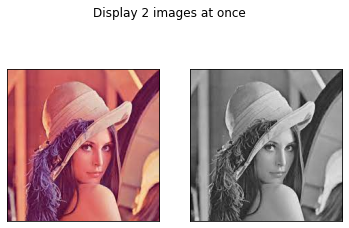

In [21]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("Display 2 images at once")
plt.show()

In [22]:
# convert the grayscale to bgr
img_gray_bgr = cv.cvtColor(img_grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack([img, img_gray_bgr])

show_img("img_combined", img_combined)

## Question 3

In [ ]:
# 3.

# load the video
video = cv.VideoCapture("videos/img_pexels.mp4")

frame_width = int(video.get(3))
frame_height = int(video.get(4))

cv.namedWindow("resize", cv.WINDOW_NORMAL)

# save the new video
fourcc = cv.VideoWriter('smaller_img_pexels.avi', 
                         cv.VideoWriter_fourcc(*'MJPG'),
                         10, (frame_width, frame_height))

while(True):
    ret, frame = video.read()
    
    # write the frame into file
    if ret == True:
        fourcc.write(frame)
        
        
    cv.imshow("resize", frame)
    
    # press the 'S' key to stop the process
    if cv.waitKey(0) & 0xFF == ord('s'):
        break
        
    else:
        break
        

video.release()
fourcc.release()
cv.AllWindowsDestroy()

## Question 4

In [ ]:
# 4. Enlarge image using different techniques
img = cv.imread("images/dog.jfif")

# i. Linear interpolation
linear_img = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)

cv.imshow("original", img)
show_img("linear_img", linear_img)

In [ ]:
img = cv.imread("images/dog.jfif")

# ii. Cubic interpolation
cubic_img = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_CUBIC)

cv.imshow("original", img)
show_img("cubic_img", cubic_img)

In [ ]:
img = cv.imread("images/dog.jfif")

# iii. Nearest neighbor interpolation
nearest_img = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_NEAREST)

cv.imshow("original", img)
show_img("nearest_img", nearest_img)